In [39]:
import torch  
import torch.nn as nn
import torch.nn.functional as F

import numpy as np  
import matplotlib.pyplot as plt
import time

from mesh import *
from utils import *
from bf import *
from condition import *

from torch import tensor as Tensor
from torch import matmul as matmul

bfltest = [] # basis function list
for _ in range(Nelt):
    bf = basisref()
    bfltest.append(bf)


def totensor(n):
    return Tensor(n, dtype=torch.float32)


### compute the intergral on each cell

$$\int_E \nabla u \cdot \nabla vd\Omega - \int_{\partial E}\nabla u \cdot \textbf{n} v ds = \int_E fvd\Omega$$

In [50]:
# ############################################################## Test ########################################################################
# def exact(p):
#     x= p[0]
#     y = p[1]
#     return exp(-x**2-y**2)

# def grad_exact(p):
#     x= p[0]
#     y = p[1]
#     return Tensor([-2*x*exp(-x**2-y**2), -2*y*exp(-x**2-y**2)])

# points = sample_triangle(5)
# p = Tensor(points[1], requires_grad=True, dtype=torch.float32)
# # print(grad_exact(p))


# def normvec(nop1, nop2, nop3):
#     '''
#     Assume the vertices of the cell is p1, p2, p3, we want compute the unit normal vector of p1-p2
#     input: nop1, nop2 stands for the number of vertices of the edge
#     output: the out norm vector of the edge consisting of p1 & p2
#     '''
#     p1 = meshvertex[nop1]; p2 = meshvertex[nop2]; p3 = meshvertex[nop3]
#     vec1 = p2 - p1
#     vec2 = p3 - p1
#     tmpvec = np.array([-vec1[1], vec1[0]])
#     t = np.dot(tmpvec, vec2)
#     if t < 1e-10:
#         return totensor(tmpvec / np.linalg.norm(tmpvec))
#     else:
#         return totensor(-tmpvec / np.linalg.norm(tmpvec))



# def intElt(noe, notf):
#     E = meshelt[noe]
#     tf = phi.get(notf)
#     gtf = grad_phi.get(notf)

#     points = sample_triangle(5)
#     Nint = len(points)
#     p1 = meshvertex[E.vertex[0]]; p2 = meshvertex[E.vertex[1]]; p3 = meshvertex[E.vertex[2]]
#     T = Tensor([0.0])

#     BE, bE = computeBE(p1, p2, p3)
#     invBE = torch.inverse(BE).t()
#     detBE = torch.det(BE)

#     for i in range(Nint):
#         p = Tensor(points[i], requires_grad=True, dtype=torch.float32)
#         realp = hat2E(BE, bE, p).requires_grad_(True)
#         # u = exact(realp)
#         gu = grad_exact(realp)

#         v = tf(p)
#         gv = matmul(invBE, gtf(p))

#         f = source(realp)

#         T += 0.5 * detBE * (matmul(gu, gv) - f * v) / Nint
#     return T



# def intBelt(noe, notf):
#     '''
#     compute the int on the boundary
#     '''
#     E = meshelt[noe]
    
#     tf = phi.get(notf)
#     gtf = grad_phi.get(notf)
#     nop1 = E.vertex[0]; nop2 = E.vertex[1]; nop3 = E.vertex[2]; 
#     p1 = meshvertex[nop1]; p2 = meshvertex[nop2]; p3 = meshvertex[nop3]
#     BE, bE = computeBE(p1, p2, p3)

#     x = sample_edge(10)
#     Nint = len(x)

#     T = Tensor([0.0])

#     # compute int on p1-p2
#     nvec = normvec(nop1, nop2, nop3)
#     leng = length(p1, p2)
#     for i in range(Nint):
#         p = Tensor(x[i],  dtype=torch.float32)
#         realp = ref2I(p1, p2, p).requires_grad_(True)
#         refp = E2hat(BE, bE, realp)

#         u = exact(realp)
#         gu = grad_exact(realp)

#         v = tf(refp)
#         T += leng * (matmul(gu, nvec) * v) / Nint
#     # print(T)
#     # compute int on p1-p3
#     nvec = normvec(nop1, nop3, nop2)
#     leng = length(p1, p3)
#     for i in range(Nint):
#         p = Tensor(x[i], dtype=torch.float32)
#         # print(p)
#         realp = ref2I(p1, p3, p).requires_grad_(True)
#         refp = E2hat(BE, bE, realp)

#         u = exact(realp)
#         gu = grad_exact(realp)
#         v = tf(refp)
#         T += leng * (matmul(gu, nvec) * v) / Nint
#     # print(T)
#     # compute int on p2-p3
#     nvec = normvec(nop2, nop3, nop1)
#     leng = length(p2, p3)
#     for i in range(Nint):
#         p = Tensor(x[i], dtype=torch.float32)
#         realp = ref2I(p2, p3, p).requires_grad_(True)
#         refp = E2hat(BE, bE, realp)

#         u = exact(realp)
#         gu = grad_exact(realp)
#         v = tf(refp)
#         T += leng * (matmul(gu, nvec) * v) / Nint
#     # print(T)
#     return T


# def computeCell(notf):
#     ''' 
#     For the integral on each cell, we use sample_triangle to generate points.
#     '''
#     T = Tensor([0.0])
#     for noe in range(Nelt):
#         cell = Tensor([0.0])
#         cell += intElt(noe, notf)
#         cell -= intBelt(noe, notf)
#         T += cell ** 2
#     return T
# for i in range(Nloc):
#     print(computeCell(i))

# def computebd():
#     T = Tensor([0.0])
#     for i in range(Nbf):
#         e = meshbdface[i]
#         p1 = meshvertex[e.vertex[0]]; p2 = meshvertex[e.vertex[1]]
#         noe = e.neighbor[0]


#         points = sample_edge(10)
#         Nint = len(points)
#         for j in range(Nint):
#             p = Tensor(points[j], requires_grad=True, dtype=torch.float32)
#             realp = ref2I(p1, p2, p)

#             u = exact(realp)
#             realu = dirichlet(realp)
#             T += (u - realu)**2
#     return T

# print(computebd())

# def computeCon():
#     T = Tensor([0.0])
#     for i in range(Nif):
#         e = meshinface[i]
#         p1 = meshvertex[e.vertex[0]]; p2 = meshvertex[e.vertex[1]]
#         n1 = e.neighbor[0]; n2 = e.neighbor[1]

#         points = sample_edge(10)
#         Nint = len(points)
#         for j in range(Nint):
#             p = Tensor(points[j], requires_grad=True, dtype=torch.float32)
#             realp = ref2I(p1, p2, p)

#             u1 = exact(realp); u2 = exact(realp)
#             T += (u1 - u2)**2
#     return T
# print(computeCon())

# def normvec_face(e: face):
#     '''norm vector from E1 point to E2'''
#     p1 = meshvertex[e.vertex[0]]; p2 = meshvertex[e.vertex[1]]
#     v0 = p2 - p1
#     E1 = meshelt[e.neighbor[0]]; E2 = meshelt[e.neighbor[1]]
#     # print(e.neighbor[0], e.neighbor[1])
#     inx = np.array([e.vertex[0], e.vertex[1]])
#     n1 = E1.vertex[~np.isin(E1.vertex, inx)][0]
#     n2 = E2.vertex[~np.isin(E2.vertex, inx)][0]
#     # print(n1, n2)
#     v1 = meshvertex[n2] - meshvertex[n1]
#     tmpvec = np.array([-v0[1], v0[0]])
#     t = np.dot(v1, tmpvec)
#     if t > -1e-10:
#         return totensor(tmpvec / np.linalg.norm(tmpvec))
#     else:
#         return totensor(-tmpvec / np.linalg.norm(tmpvec))


# def computeGradCon():
#     T = Tensor([0.0])
#     for i in range(Nif):
#         e = meshinface[i]
#         p1 = meshvertex[e.vertex[0]]; p2 = meshvertex[e.vertex[1]]
#         n1 = e.neighbor[0]; n2 = e.neighbor[1]
#         nvec = normvec_face(e)
#         points = sample_edge(10)
#         Nint = len(points)
#         for j in range(Nint):
#             p = Tensor(points[j], requires_grad=True, dtype=torch.float32)
#             realp = ref2I(p1, p2, p).requires_grad_(True)

#             gu1 = grad_exact(realp)
#             gu2 = grad_exact(realp)

#             T += (matmul(gu1 - gu2, nvec))**2
#     return T

# print(computeGradCon())

tensor([0.0007], grad_fn=<AddBackward0>)
tensor([0.0037], grad_fn=<AddBackward0>)
tensor([0.0020], grad_fn=<AddBackward0>)
tensor([0.0069], grad_fn=<AddBackward0>)
tensor([0.0010], grad_fn=<AddBackward0>)
tensor([0.0017], grad_fn=<AddBackward0>)
tensor([0.])
tensor([0.])
tensor([0.])


In [41]:
def normvec(nop1, nop2, nop3):
    '''
    Assume the vertices of the cell is p1, p2, p3, we want compute the unit normal vector of p1-p2
    input: nop1, nop2 stands for the number of vertices of the edge
    output: the out norm vector of the edge consisting of p1 & p2
    '''
    p1 = meshvertex[nop1]; p2 = meshvertex[nop2]; p3 = meshvertex[nop3]
    vec1 = p2 - p1
    vec2 = p3 - p1
    tmpvec = np.array([-vec1[1], vec1[0]])
    t = np.dot(tmpvec, vec2)
    if t < 1e-10:
        return totensor(tmpvec / np.linalg.norm(tmpvec))
    else:
        return totensor(-tmpvec / np.linalg.norm(tmpvec))

bflist = [] # basis function list
for _ in range(Nelt):
    bf = basisref()
    bflist.append(bf)



def intElt(bflist, noe, notf):
    E = meshelt[noe]
    bf = bflist[noe]
    tf = phi.get(notf)
    gtf = grad_phi.get(notf)

    points = sample_triangle(5)
    Nint = len(points)
    p1 = meshvertex[E.vertex[0]]; p2 = meshvertex[E.vertex[1]]; p3 = meshvertex[E.vertex[2]]
    T = Tensor([0.0])

    BE, bE = computeBE(p1, p2, p3)
    invBE = torch.inverse(BE).t()
    detBE = torch.det(BE)

    for i in range(Nint):
        p = Tensor(points[i], requires_grad=True, dtype=torch.float32)
        realp = hat2E(BE, bE, p).requires_grad_(True)
        u = bf(realp)
        gu = torch.autograd.grad(u, realp, create_graph=True, retain_graph=True)[0]

        v = tf(p)
        gv = matmul(invBE, gtf(p))

        f = source(realp)

        T += 0.5 * detBE * (matmul(gu, gv) - f * v) / Nint
    return T

def intBelt(bflist, noe, notf):
    '''
    compute the int on the boundary
    '''
    E = meshelt[noe]
    
    bf = bflist[noe]
    tf = phi.get(notf)
    gtf = grad_phi.get(notf)
    nop1 = E.vertex[0]; nop2 = E.vertex[1]; nop3 = E.vertex[2]; 
    p1 = meshvertex[nop1]; p2 = meshvertex[nop2]; p3 = meshvertex[nop3]
    BE, bE = computeBE(p1, p2, p3)

    x = sample_edge(10)
    Nint = len(x)

    T = Tensor([0.0])

    # compute int on p1-p2
    nvec = normvec(nop1, nop2, nop3)
    leng = length(p1, p2)
    for i in range(Nint):
        p = Tensor(x[i],  dtype=torch.float32)
        realp = ref2I(p1, p2, p).requires_grad_(True)
        refp = E2hat(BE, bE, realp)

        u = bf(realp)
        gu = torch.autograd.grad(u, realp, retain_graph=True, create_graph=True)[0]

        v = tf(refp)
        T += leng * (matmul(gu, nvec) * v) / Nint
    # print(T)
    # compute int on p1-p3
    nvec = normvec(nop1, nop3, nop2)
    leng = length(p1, p3)
    for i in range(Nint):
        p = Tensor(x[i], dtype=torch.float32)
        # print(p)
        realp = ref2I(p1, p3, p).requires_grad_(True)
        refp = E2hat(BE, bE, realp)

        u = bf(realp)
        gu = torch.autograd.grad(u, realp, retain_graph=True, create_graph=True)[0]

        v = tf(refp)
        T += leng * (matmul(gu, nvec) * v) / Nint
    # print(T)
    # compute int on p2-p3
    nvec = normvec(nop2, nop3, nop1)
    leng = length(p2, p3)
    for i in range(Nint):
        p = Tensor(x[i], dtype=torch.float32)
        realp = ref2I(p2, p3, p).requires_grad_(True)
        refp = E2hat(BE, bE, realp)

        u = bf(realp)
        gu = torch.autograd.grad(u, realp, retain_graph=True, create_graph=True)[0]

        v = tf(refp)
        T += leng * (matmul(gu, nvec) * v) / Nint
    # print(T)
    return T

print(intElt(bflist, 0, 1))


def computeCell(bflist, notf):
    ''' 
    For the integral on each cell, we use sample_triangle to generate points.
    '''
    T = Tensor([0.0])
    for noe in range(Nelt):
        cell = Tensor([0.0])
        cell += intElt(bflist, noe, notf)
        cell -= intBelt(bflist, noe, notf)
        T += cell ** 2
    return T

print(computeCell(bflist, 1))
        



tensor([-0.0508], grad_fn=<AddBackward0>)
tensor([0.0754], grad_fn=<AddBackward0>)


### compute the loss on the boundary
$$\sum_{e\in Boundary}\int_e (u - realu)^2$$

In [42]:
def computebd(bflist):
    T = Tensor([0.0])
    for i in range(Nbf):
        e = meshbdface[i]
        p1 = meshvertex[e.vertex[0]]; p2 = meshvertex[e.vertex[1]]
        noe = e.neighbor[0]
        bf = bflist[noe]

        points = sample_edge(10)
        Nint = len(points)
        for j in range(Nint):
            p = Tensor(points[j], requires_grad=True, dtype=torch.float32)
            realp = ref2I(p1, p2, p)

            u = bf(realp)
            realu = dirichlet(realp)
            T += (u - realu)**2
    return T

print(computebd(bflist))

tensor([13.6772], grad_fn=<AddBackward0>)


### compute the loss of function continuity
$$\sum_{e\in innerface}\int_e[u]^2$$

In [43]:
def computeCon(bflist):
    T = Tensor([0.0])
    for i in range(Nif):
        e = meshinface[i]
        p1 = meshvertex[e.vertex[0]]; p2 = meshvertex[e.vertex[1]]
        n1 = e.neighbor[0]; n2 = e.neighbor[1]
        bf1 = bflist[n1]; bf2 = bflist[n2]

        points = sample_edge(10)
        Nint = len(points)
        for j in range(Nint):
            p = Tensor(points[j], requires_grad=True, dtype=torch.float32)
            realp = ref2I(p1, p2, p)

            u1 = bf1(realp); u2 = bf2(realp)
            T += (u1 - u2)**2
    return T
print(computeCon(bflist))

tensor([5.9763], grad_fn=<AddBackward0>)


### compute the loss of continuity of function gradience
$$\sum_{e\in innerface}\int_e [\nabla u\cdot \textbf{n}]^2$$

In [44]:
def normvec_face(e: face):
    '''norm vector from E1 point to E2'''
    p1 = meshvertex[e.vertex[0]]; p2 = meshvertex[e.vertex[1]]
    v0 = p2 - p1
    E1 = meshelt[e.neighbor[0]]; E2 = meshelt[e.neighbor[1]]
    # print(e.neighbor[0], e.neighbor[1])
    inx = np.array([e.vertex[0], e.vertex[1]])
    n1 = E1.vertex[~np.isin(E1.vertex, inx)][0]
    n2 = E2.vertex[~np.isin(E2.vertex, inx)][0]
    # print(n1, n2)
    v1 = meshvertex[n2] - meshvertex[n1]
    tmpvec = np.array([-v0[1], v0[0]])
    t = np.dot(v1, tmpvec)
    if t > -1e-10:
        return totensor(tmpvec / np.linalg.norm(tmpvec))
    else:
        return totensor(-tmpvec / np.linalg.norm(tmpvec))


def computeGradCon(bflist):
    T = Tensor([0.0])
    for i in range(Nif):
        e = meshinface[i]
        p1 = meshvertex[e.vertex[0]]; p2 = meshvertex[e.vertex[1]]
        n1 = e.neighbor[0]; n2 = e.neighbor[1]
        bf1 = bflist[n1]; bf2 = bflist[n2]
        nvec = normvec_face(e)
        points = sample_edge(10)
        Nint = len(points)
        for j in range(Nint):
            p = Tensor(points[j], requires_grad=True, dtype=torch.float32)
            realp = ref2I(p1, p2, p).requires_grad_(True)

            u1 = bf1(realp); u2 = bf2(realp)
            gu1 = torch.autograd.grad(u1, realp, retain_graph=True, create_graph=True)[0]
            gu2 = torch.autograd.grad(u2, realp, retain_graph=True, create_graph=True)[0]

            T += (matmul(gu1 - gu2, nvec))**2
    return T
print(computeGradCon(bflist))

tensor([0.4448], grad_fn=<AddBackward0>)


In [45]:
def trainplug(bflist):
    for i in range(Nelt):
        bflist[i].train()
def evalplug(bflist):
    for i in range(Nelt):
        bflist[i].eval()
def aggpara(bflist):
    parameters = list()
    for i in range(Nelt):
        parameters += list(bflist[i].parameters())
    return parameters

class Solver:
    def __init__(self) -> None:
        bflist = [] # basis function list
        for _ in range(Nelt):
            bf = basisref()
            bflist.append(bf)
        self.models = bflist
        self.parameters = aggpara(self.models)
        self.optimizer = torch.optim.LBFGS(self.parameters, lr=0.001, max_iter=50000, max_eval=50000, history_size=50, 
                                           tolerance_grad=1e-7, tolerance_change=1.0 * np.finfo(float).eps, line_search_fn='strong_wolfe')
        self.maxIter = 1000
        self.iter = 1

    def lossfunc(self):
        self.optimizer.zero_grad()
        dgloss = Tensor([0.0])
        for i in range(Nloc):
            dgloss += computeCell(self.models, i)
        loss = dgloss
        bdloss = computebd(self.models)
        conloss = computeCon(self.models)
        gconloss = computeGradCon(self.models)

        loss += dgloss + bdloss + conloss + gconloss
        loss.backward()
        self.iter += 1
        if self.iter % 10 == 0:
            print(f"The {self.iter}th training, loss is {loss.item()}: dgloss is {dgloss.item()}, conloss is {conloss.item()}, bdloss is {bdloss.item()}, gconloss is {gconloss.item()}")
        
        return loss
    
    def train(self):
        trainplug(self.models)
        self.optimizer.step(self.lossfunc)
        loss = self.lossfunc()
        print(f"Finish training! The {self.iter}th training, loss is {loss.item()}!")

In [46]:
net = Solver()
net.train()

The 10th training, loss is 9.210345268249512: dgloss is 9.210345268249512, conloss is 1.292510986328125, bdloss is 5.474922180175781, gconloss is 1.1016852855682373
The 20th training, loss is 5.168214321136475: dgloss is 5.168214321136475, conloss is 0.7341778874397278, bdloss is 2.537604808807373, gconloss is 0.5554148554801941
The 30th training, loss is 4.2825751304626465: dgloss is 4.2825751304626465, conloss is 0.6875008344650269, bdloss is 2.080176830291748, gconloss is 0.17381936311721802
The 40th training, loss is 3.3934648036956787: dgloss is 3.3934648036956787, conloss is 0.4658375680446625, bdloss is 1.3306142091751099, gconloss is 0.25524264574050903
The 50th training, loss is 2.36965274810791: dgloss is 2.36965274810791, conloss is 0.23187470436096191, bdloss is 0.49146974086761475, gconloss is 0.3027726411819458
The 60th training, loss is 1.8563917875289917: dgloss is 1.8563917875289917, conloss is 0.1756424456834793, bdloss is 0.2989286184310913, gconloss is 0.03726004809

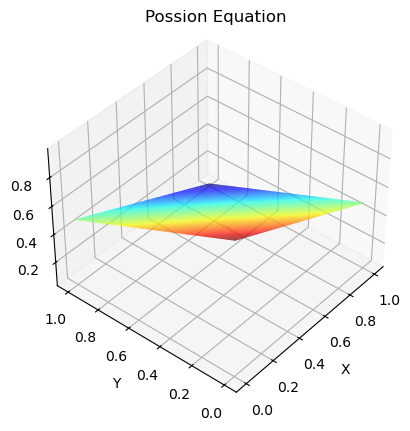

In [48]:
def plot3D(model): 
    fig = plt.figure()    
    n_inter = 50
    p_inter = totensor(sample_triangle(n_inter))
    N_inter = p_inter.shape[0]
    N_tol = Nelt * N_inter
    sol = torch.zeros(N_tol)
    plot_p = torch.zeros((N_tol, 2))
    for i in range(Nelt):
        for j in range(N_inter):
            n1 = Mesh[i][0]; n2 = Mesh[i][1]; n3 = Mesh[i][2]
            p1 = meshvertex[n1]; p2 = meshvertex[n2]; p3 = meshvertex[n3]; 
            BE, bE = computeBE(p1, p2, p3)
            ie = i * N_inter + j
            real_p = hat2E(BE, bE, p_inter[j])

            sol[ie] = model.models[i](real_p)
            plot_p[ie] = real_p
    plot_p = plot_p.detach().numpy()  
    sol = sol.detach().numpy()  
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=40, azim=220)
    ax.plot_trisurf(plot_p[:, 0], plot_p[:, 1], sol, cmap='jet')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Possion Equation')
    plt.show()
plot3D(net)